# Lógica fuzzy: consumo esperado de um refrigerante

- Antecedentes:
    - Temperatura ambiente: baixa, média & alta;
    - Preço unitário: baixo, médio & alto.

- Consequente:
    - Consumo esperado: pequeno, médio e grande.

Conjunto de Regras:
1. temperatura baixa E preco baixo => consumo grande;
2. temperatura baixa E preco medio => consumo medio;
3. temperatura baixa E preco alto => consumo pequeno;
4. temperatura media E preco baixo => consumo grande;
5. temperatura media E preco medio => consumo medio;
6. temperatura media E preco alto => consumo pequeno;
7. temperatura alta E preco baixo => consumo grande;
8. temperatura alta E preco medio => consumo medio;
9. temperatura alta E preco alto => consumo pequeno.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
temperatura_ambiente = ctrl.Antecedent(np.arange(15,45+1,1),
                                       "temperatura ambiente")
preco_unitario = ctrl.Antecedent(np.arange(1,6+1,1),
                                 "preco unitario")

consumo_esperado = ctrl.Consequent(np.arange(500,6000+1,250),
                                   "consumo esperado")

In [3]:
temperatura_ambiente['low'] = fuzz.gaussmf(temperatura_ambiente.universe,
                                           mean=15, sigma=6.369)
temperatura_ambiente['medium'] = fuzz.gaussmf(temperatura_ambiente.universe,
                                              mean=30, sigma=6.369)
temperatura_ambiente['high'] = fuzz.gaussmf(temperatura_ambiente.universe,
                                            mean=45, sigma=6.369)

In [4]:
preco_unitario['low'] = fuzz.gaussmf(preco_unitario.universe,
                                     mean=1, sigma=1.061)
preco_unitario['medium'] = fuzz.gaussmf(preco_unitario.universe,
                                        mean=3.05, sigma=1.061)
preco_unitario['high'] = fuzz.gaussmf(preco_unitario.universe,
                                      mean=6, sigma=1.061)

t:\college\College_tasks\7_Seventh_semester\AI\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


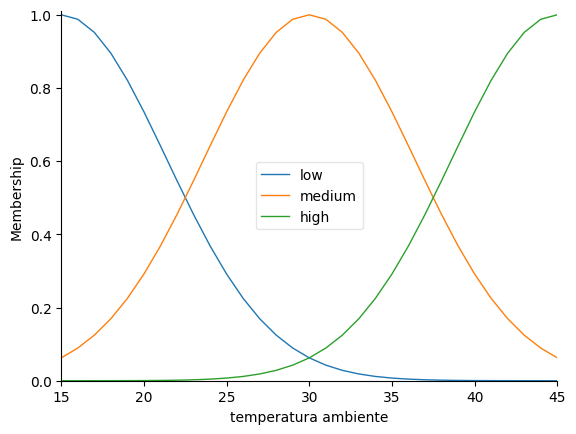

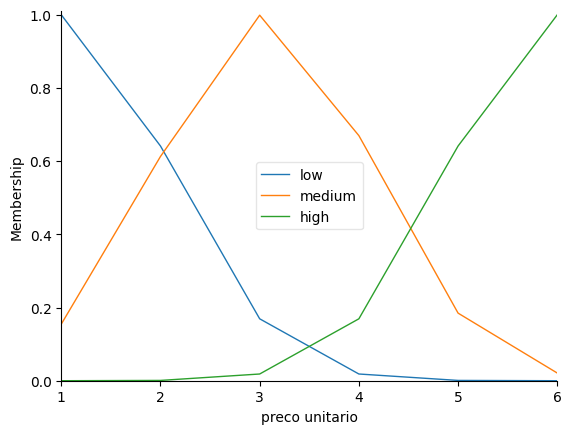

In [5]:
temperatura_ambiente.view()
preco_unitario.view()

In [6]:
consumo_esperado['small'] = fuzz.trimf(consumo_esperado.universe,
                                       [-2250, 500, 3250])
consumo_esperado['medium'] = fuzz.trimf(consumo_esperado.universe,
                                        [500, 3250, 6000])
consumo_esperado['big'] = fuzz.trimf(consumo_esperado.universe,
                                     [3250, 6000, 8750])

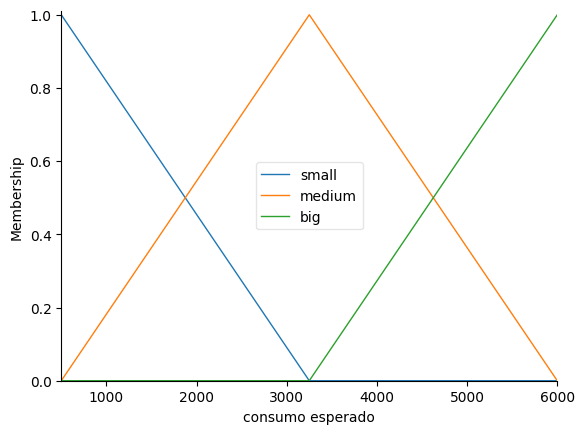

In [7]:
consumo_esperado.view()

## Regras do sistema

In [8]:
# Temperatura baixa
regra1 = ctrl.Rule(
    temperatura_ambiente['low'] & preco_unitario['low'],
    consumo_esperado['big']
)
regra2 = ctrl.Rule(
    temperatura_ambiente['low'] & preco_unitario['medium'],
    consumo_esperado['medium']
)
regra3 = ctrl.Rule(
    temperatura_ambiente['low'] & preco_unitario['high'],
    consumo_esperado['small']
)
# Temperatura média
regra4 = ctrl.Rule(
    temperatura_ambiente['medium'] & preco_unitario['low'],
    consumo_esperado['big']
)
regra5 = ctrl.Rule(
    temperatura_ambiente['medium'] & preco_unitario['medium'],
    consumo_esperado['medium']
)
regra6 = ctrl.Rule(
    temperatura_ambiente['medium'] & preco_unitario['high'],
    consumo_esperado['small']
)
# Temperatura alta
regra7 = ctrl.Rule(
    temperatura_ambiente['high'] & preco_unitario['low'],
    consumo_esperado['big']
)
regra8 = ctrl.Rule(
    temperatura_ambiente['high'] & preco_unitario['medium'],
    consumo_esperado['medium']
)
regra9 = ctrl.Rule(
    temperatura_ambiente['high'] & preco_unitario['high'],
    consumo_esperado['small']
)

## Sistema de controle

In [9]:
sistema_controle = ctrl.ControlSystem(
    [regra1, regra2, regra3,
     regra4, regra5, regra6,
     regra7, regra8, regra9])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

Consumo esperado: 3250 unidades


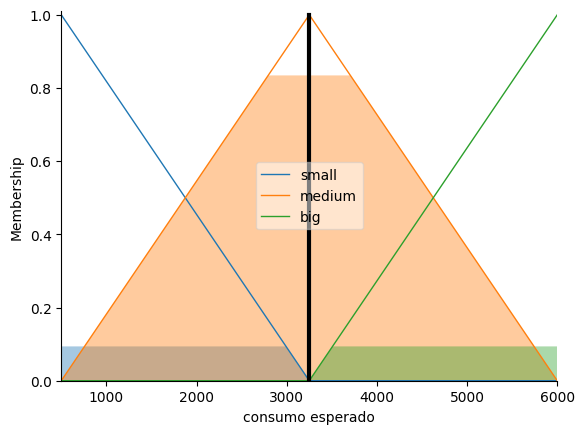

In [10]:
# Testagem
sistema.input['temperatura ambiente'] = 30
sistema.input['preco unitario'] = 3.5
sistema.compute()

print(f"Consumo esperado: {sistema.output['consumo esperado']:.0f} unidades")

consumo_esperado.view(sim = sistema)